# Exploring dataset

In [1]:
import time

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report

from imblearn.under_sampling import RandomUnderSampler

In [2]:
def write_predictions(predictions, file_name='pred.csv'):
    with open(file_name, 'w') as file:
        file.write('ID,Label')
        for index, value in enumerate(predictions):
            file.write('\n{0},{1}'.format(index+1, value))

### Load the datasets

In [3]:
X_train = pd.read_csv('Train/trainVectors.csv', header=None).transpose()
y_train = pd.read_csv('Train/trainLbls.csv', header=None, names=['label'])

In [4]:
X_validation = pd.read_csv('Validation/valVectors.csv', header=None).transpose()
y_validation = pd.read_csv('Validation/valLbls.csv', header=None, names=['label'])

In [5]:
X_test = pd.read_csv('Test/testVectors.csv', header=None).transpose()

In [6]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5830 entries, 0 to 5829
Columns: 4096 entries, 0 to 4095
dtypes: float64(4096)
memory usage: 182.4 MB


In [7]:
y_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5830 entries, 0 to 5829
Data columns (total 1 columns):
label    5830 non-null int64
dtypes: int64(1)
memory usage: 45.6 KB


### Number of labels

In [8]:
y_train['label'].unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29])

### Distribution of labels

We need to check whether our data is balanced.

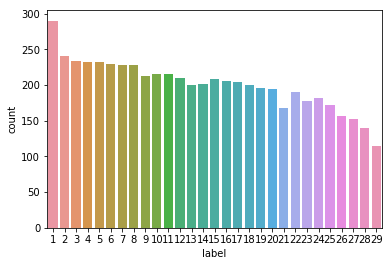

In [9]:
sns.countplot(x='label', data=y_train)

### Resampling the data

The data set is unbalaced. Let us try undersampling.

In [10]:
sampler = RandomUnderSampler(random_state=42)
X_train_resampled, y_train_resampled = sampler.fit_sample(X_train, y_train['label'])

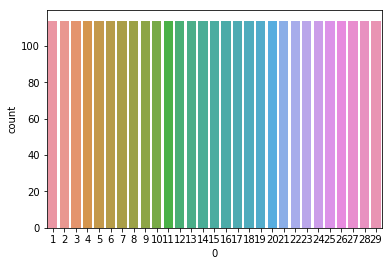

In [11]:
sns.countplot(x=0, data=pd.DataFrame(y_train_resampled))

## Random Classifier

To generate random set of labels, we need to ensure that the label numbers are consecutive.

In [12]:
y_train['label'].unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29])

In [13]:
import random
population = y_train['label']
sample_size = 3460 # X_test.shape[0]
y_random = random.choices(population, k=sample_size)

In [14]:
write_predictions(y_random, 'random-1.csv')

## Classification using k-Nearest Neighbours

In [15]:
def plot_knn_score(X_train, y_train, k_from=5, k_to=10):
    k_scores = []
    k_values = np.arange(k_from, k_to, 1)
    for k in k_values:
        start_time = time.time()
        print('Running k-Neighbors with k={}'.format(k))
        knn = KNeighborsClassifier(n_neighbors=k)
        scores = cross_val_score(knn, X_train, y_train, scoring='accuracy')
        avg_score = np.mean(scores)
        k_scores.append(avg_score)
        duration = time.time() - start_time
        print(' - average score for k={} is {}. Completed in {} seconds'.format(k, avg_score, duration))

    # Plot the scores
    fig, ax = plt.subplots(figsize=(10,4))
    ax.plot(k_values, k_scores, 'o-')
    ax.set_xlabel('$k$')
    ax.set_ylabel('Score')

### kNN with the balanced data set

Find the best $k$ value for the balanced dataset

Running k-Neighbors with k=1
 - average score for k=1 is 0.6430732002419842. Completed in 56.98434638977051 seconds
Running k-Neighbors with k=2
 - average score for k=2 is 0.6143375680580762. Completed in 58.932398319244385 seconds
Running k-Neighbors with k=3
 - average score for k=3 is 0.6512401693889897. Completed in 61.8937611579895 seconds
Running k-Neighbors with k=4
 - average score for k=4 is 0.6727162734422262. Completed in 59.80538296699524 seconds
Running k-Neighbors with k=5
 - average score for k=5 is 0.6823956442831216. Completed in 60.01204800605774 seconds
Running k-Neighbors with k=6
 - average score for k=6 is 0.6802782819116757. Completed in 60.70847129821777 seconds
Running k-Neighbors with k=7
 - average score for k=7 is 0.6845130066545675. Completed in 59.54422068595886 seconds
Running k-Neighbors with k=8
 - average score for k=8 is 0.6866303690260134. Completed in 59.35246992111206 seconds
Running k-Neighbors with k=9
 - average score for k=9 is 0.6866303690260

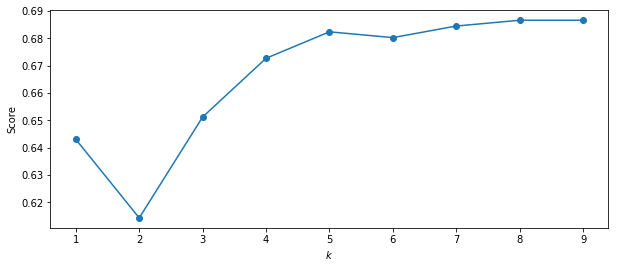

In [41]:
plot_knn_score(X_train_resampled, y_train_resampled, k_from=1, k_to=10)

Running k-Neighbors with k=10
 - average score for k=10 is 0.6884452510586812. Completed in 59.647788763046265 seconds
Running k-Neighbors with k=11
 - average score for k=11 is 0.6875378100423473. Completed in 59.55633211135864 seconds
Running k-Neighbors with k=12
 - average score for k=12 is 0.6923774954627948. Completed in 59.73446726799011 seconds
Running k-Neighbors with k=13
 - average score for k=13 is 0.6978221415607985. Completed in 59.74858617782593 seconds
Running k-Neighbors with k=14
 - average score for k=14 is 0.6969147005444646. Completed in 59.79623746871948 seconds
Running k-Neighbors with k=15
 - average score for k=15 is 0.690865093768905. Completed in 59.786160469055176 seconds
Running k-Neighbors with k=16
 - average score for k=16 is 0.6923774954627948. Completed in 59.78726553916931 seconds
Running k-Neighbors with k=17
 - average score for k=17 is 0.6926799758015729. Completed in 59.82225513458252 seconds
Running k-Neighbors with k=18
 - average score for k=18

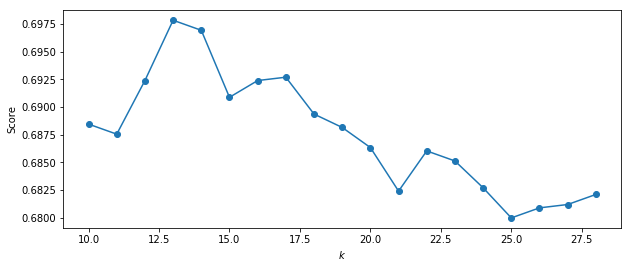

In [42]:
plot_knn_score(X_train_resampled, y_train_resampled, k_from=10, k_to=29)

It seems that the best $k$ is 13. Next, we try to predict labels using the validation dataset.

In [16]:
knn = KNeighborsClassifier(n_neighbors=13)
knn.fit(X_train_resampled, y_train_resampled)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=13, p=2,
           weights='uniform')

In [17]:
y_validation_predictions = knn.predict(X_validation)
print(classification_report(y_validation, y_validation_predictions))

             precision    recall  f1-score   support

          1       0.97      1.00      0.99       116
          2       0.41      0.52      0.46        96
          3       0.73      0.51      0.60        94
          4       0.91      0.84      0.87        92
          5       0.66      0.76      0.71        88
          6       0.42      0.61      0.50        92
          7       0.36      0.50      0.42        92
          8       0.33      0.36      0.35        88
          9       0.80      0.80      0.80        88
         10       0.50      0.43      0.46        82
         11       0.93      0.92      0.92        86
         12       0.51      0.78      0.62        80
         13       0.98      0.75      0.85        80
         14       0.83      0.41      0.55        82
         15       0.66      0.67      0.67        82
         16       0.87      0.50      0.64        82
         17       0.96      0.84      0.89        80
         18       0.92      0.82      0.87   

In [18]:
y_test_predictions = knn.predict(X_test)

In [19]:
write_predictions(y_test_predictions, 'knn-k13-balanced-training.csv')

### kNN with all data points

Running k-Neighbors with k=4
 - average score for k=4 is 0.702933240440112. Completed in 179.85105729103088 seconds
Running k-Neighbors with k=5
 - average score for k=5 is 0.7049781389428929. Completed in 183.3263759613037 seconds
Running k-Neighbors with k=6
 - average score for k=6 is 0.7051445363923504. Completed in 183.2727563381195 seconds
Running k-Neighbors with k=7
 - average score for k=7 is 0.7101373951627248. Completed in 181.865225315094 seconds
Running k-Neighbors with k=8
 - average score for k=8 is 0.7132163013737909. Completed in 182.2682340145111 seconds
Running k-Neighbors with k=9
 - average score for k=9 is 0.7147688960923547. Completed in 182.81168174743652 seconds
Running k-Neighbors with k=10
 - average score for k=10 is 0.7164952833472898. Completed in 183.2762155532837 seconds
Running k-Neighbors with k=11
 - average score for k=11 is 0.7161664679585883. Completed in 185.98030877113342 seconds
Running k-Neighbors with k=12
 - average score for k=12 is 0.716678

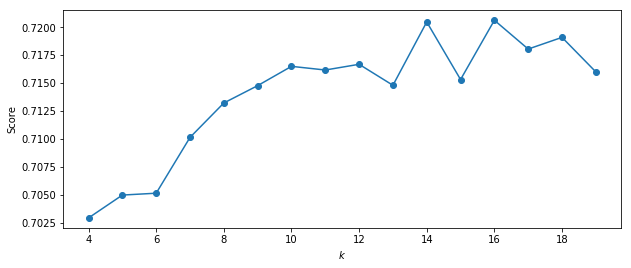

In [48]:
plot_knn_score(X_train, y_train['label'], k_from=4, k_to=20)

Running k-Neighbors with k=20
 - average score for k=20 is 0.7158169258330687. Completed in 187.7631754875183 seconds
Running k-Neighbors with k=21
 - average score for k=21 is 0.713588915356556. Completed in 185.65223693847656 seconds
Running k-Neighbors with k=22
 - average score for k=22 is 0.7189021566747763. Completed in 186.06444573402405 seconds


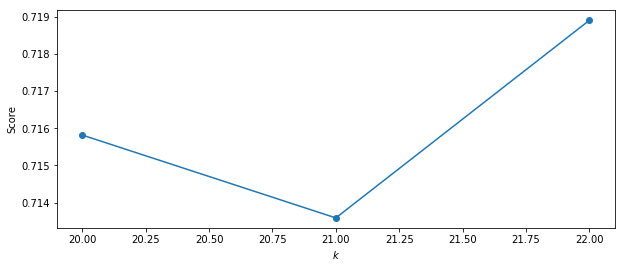

In [49]:
plot_knn_score(X_train, y_train['label'], k_from=20, k_to=23)

It seems $k=14$ is a good value.

In [20]:
# Train the model
knn = KNeighborsClassifier(n_neighbors=14)
knn.fit(X_train, y_train['label'])

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=14, p=2,
           weights='uniform')

In [21]:
# Test the model again the Validation dataset
y_validation_predictions = knn.predict(X_validation)
print(classification_report(y_validation, y_validation_predictions))

             precision    recall  f1-score   support

          1       0.97      1.00      0.98       116
          2       0.40      0.54      0.46        96
          3       0.65      0.66      0.65        94
          4       0.90      0.85      0.87        92
          5       0.65      0.81      0.72        88
          6       0.42      0.57      0.48        92
          7       0.36      0.55      0.44        92
          8       0.40      0.39      0.39        88
          9       0.79      0.82      0.80        88
         10       0.50      0.49      0.49        82
         11       0.91      0.95      0.93        86
         12       0.55      0.75      0.63        80
         13       0.93      0.80      0.86        80
         14       0.81      0.48      0.60        82
         15       0.71      0.70      0.70        82
         16       0.87      0.56      0.68        82
         17       0.94      0.85      0.89        80
         18       0.92      0.82      0.87   

In [22]:
# Predict the labels for the Test dataset
y_test_predictions = knn.predict(X_test)

In [23]:
# Write to file
write_predictions(y_test_predictions, 'knn-k14.csv')